<a href="https://colab.research.google.com/github/AryanMethil/Brain_Tumor_Detection/blob/master/Brain_Tumour_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
%cd '/content/drive/My Drive/Brain_Tumor_Classification/src'

/content/drive/My Drive/Brain_Tumor_Classification/src


In [5]:
!pwd

/content/drive/My Drive/Brain_Tumor_Classification/src


In [6]:
import os
import shutil
from cv2 import *
from google.colab.patches import cv2_imshow
from constants import *
import numpy as np

In [7]:
%cd '/content/'


/content


# Image Preprocessing

In [ ]:
os.makedirs(image_preprocessed_yes,exist_ok=True)
for _,_,files in os.walk(yes):
  for f in files:
    img_path=os.path.join(yes,f)
    norm=imread(img_path)
    norm=cvtColor(norm,COLOR_BGR2GRAY)

    th1=equalizeHist(norm)
   
    th1=erode(th1,np.ones((4,4),np.uint8),iterations=1)
    th1=dilate(th1,np.ones((4,4),np.uint8),iterations=1)

    imwrite(image_preprocessed_yes+f,th1)

os.makedirs(image_preprocessed_no,exist_ok=True)
for _,_,files in os.walk(no):
  for f in files:
    img_path=os.path.join(no,f)
    norm=imread(img_path)
    norm=cvtColor(norm,COLOR_BGR2GRAY)

    th1=equalizeHist(norm)
   
    th1=erode(th1,np.ones((4,4),np.uint8),iterations=1)
    th1=dilate(th1,np.ones((4,4),np.uint8),iterations=1)
    
    imwrite(image_preprocessed_no+f,th1)

In [ ]:
os.makedirs(image_generator_test_yes,exist_ok=True)
for _,_,files in os.walk(test_yes):
  for f in files:
    img_path=os.path.join(test_yes,f)
    norm=imread(img_path)
    norm=cvtColor(norm,COLOR_BGR2GRAY)

    th1=equalizeHist(norm)
   
    th1=erode(th1,np.ones((4,4),np.uint8),iterations=1)
    th1=dilate(th1,np.ones((4,4),np.uint8),iterations=1)

    imwrite(image_generator_test_yes+r'/'+f,th1)

os.makedirs(image_generator_test_no,exist_ok=True)
for _,_,files in os.walk(test_no):
  for f in files:
    img_path=os.path.join(test_no,f)
    norm=imread(img_path)
    norm=cvtColor(norm,COLOR_BGR2GRAY)

    th1=equalizeHist(norm)
   
    th1=erode(th1,np.ones((4,4),np.uint8),iterations=1)
    th1=dilate(th1,np.ones((4,4),np.uint8),iterations=1)
    
    imwrite(image_generator_test_no+r'/'+f,th1)

In [ ]:
brain_tumour_no= image_preprocessed_no
brain_tumour_yes=image_preprocessed_yes

In [ ]:
os.makedirs(image_generator_train_yes,exist_ok=True)
os.makedirs(image_generator_train_no,exist_ok=True)
os.makedirs(image_generator_validation_yes,exist_ok=True)
os.makedirs(image_generator_validation_no,exist_ok=True)

In [ ]:
for dir,subdir,files in os.walk(brain_tumour_no):
  for f in files[:int(len(files)*0.7)]:
    shutil.copy(os.path.join(brain_tumour_no,f),image_generator_train_no)
  for f in files[int(len(files)*0.7):]:
    shutil.copy(os.path.join(brain_tumour_no,f),image_generator_validation_no)


In [ ]:
for dir,subdir,files in os.walk(brain_tumour_yes):
  for f in files[:int(len(files)*0.7)]:
    shutil.copy(os.path.join(brain_tumour_yes,f),image_generator_train_yes)
  for f in files[int(len(files)*0.7):]:
    shutil.copy(os.path.join(brain_tumour_yes,f),image_generator_validation_yes)

In [ ]:
for dir,subdir,files in os.walk(image_generator_train_yes):
  print(len(files))
for dir,subdir,files in os.walk(image_generator_train_no):
  print(len(files))


1187
420


# Model

In [1]:
!pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2MB 33kB/s 
     |████████████████████████████████| 460kB 40.8MB/s 
     |████████████████████████████████| 3.0MB 35.6MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [8]:

base_model=tf.keras.applications.ResNet101V2(include_top=False,weights='imagenet',input_shape=(150,150,3))
base_model.trainable=False
model=tf.keras.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

171319296/171317808 [==============================] - 8s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Model)          (None, 5, 5, 2048)        42626560  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               13107456  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 55,734,273
Trainable params: 13,107,713
Non-trainable params: 42,626,560
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
              metrics=['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])

In [10]:
train_data_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                  rotation_range=30,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0.6,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
validation_data_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_data_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [11]:
train_gen=train_data_generator.flow_from_directory(image_generator_train,
                                                   target_size=(150,150),
                                                   class_mode='binary',
                                                   batch_size=8,
                                                   shuffle=True)
validation_gen=train_data_generator.flow_from_directory(image_generator_validation,
                                                   target_size=(150,150),
                                                   class_mode='binary',
                                                   batch_size=8,
                                                   shuffle=True)
test_gen=test_data_generator.flow_from_directory(image_generator_test,
                                                   target_size=(150,150),
                                                   class_mode='binary',
                                                   batch_size=8,
                                                   shuffle=True)

Found 2424 images belonging to 2 classes.
Found 1778 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [12]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs['accuracy']>0.99):
      self.model.stop_training=True
callbacks=MyCallback()

In [13]:
history=model.fit(train_gen,validation_data=validation_gen,epochs=20,callbacks=callbacks)

Epoch 1/20
303/303 [==============================] - 2630s 9s/step - loss: 0.4364 - accuracy: 0.9175 - precision: 0.9477 - recall: 0.9447 - val_loss: 0.0816 - val_accuracy: 0.9663 - val_precision: 0.9649 - val_recall: 0.9952
Epoch 2/20
303/303 [==============================] - 50s 166ms/step - loss: 0.2008 - accuracy: 0.9377 - precision: 0.9612 - recall: 0.9575 - val_loss: 0.0735 - val_accuracy: 0.9747 - val_precision: 0.9823 - val_recall: 0.9870
Epoch 3/20
303/303 [==============================] - 50s 165ms/step - loss: 0.1800 - accuracy: 0.9427 - precision: 0.9684 - recall: 0.9565 - val_loss: 0.0314 - val_accuracy: 0.9893 - val_precision: 0.9952 - val_recall: 0.9918
Epoch 4/20
303/303 [==============================] - 50s 164ms/step - loss: 0.1146 - accuracy: 0.9600 - precision: 0.9773 - recall: 0.9704 - val_loss: 0.0448 - val_accuracy: 0.9803 - val_precision: 0.9844 - val_recall: 0.9918
Epoch 5/20
303/303 [==============================] - 49s 163ms/step - loss: 0.1061 - accurac

In [14]:
model.save(models_directory+'DS2_ResNet_3_Tensorflow_2point2_Histo_Erode_Dilate.h5')

# Plotting Accuracy, Precision & Recall

In [15]:
epochs=20

Text(0.5, 1.0, 'Training and validation Recall')

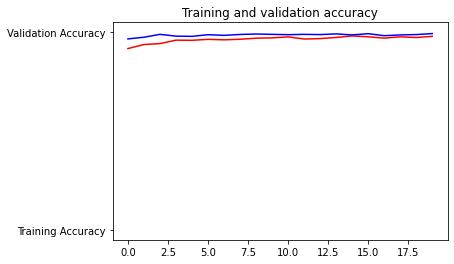

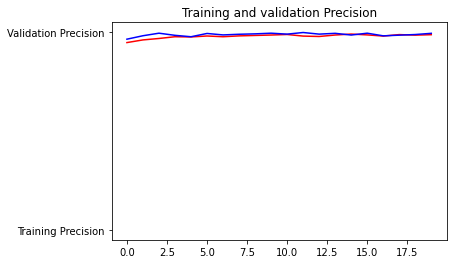

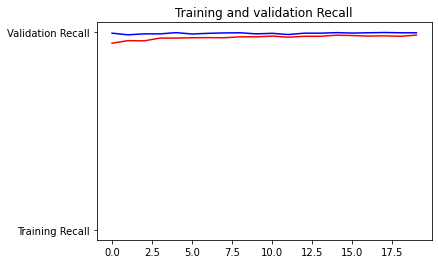

In [16]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
precision=history.history['precision']
val_precision=history.history['val_precision']
recall=history.history['recall']
val_recall=history.history['val_recall']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation Precision per epoch
#------------------------------------------------
plt.plot(epochs, precision, 'r', "Training Precision")
plt.plot(epochs, val_precision, 'b', "Validation Precision")
plt.title('Training and validation Precision')
plt.figure()

plt.plot(epochs, recall, 'r', "Training Recall")
plt.plot(epochs, val_recall, 'b', "Validation Recall")
plt.title('Training and validation Recall')


# Predicting against Test Images from the Internet

In [17]:
reloaded_model=tf.keras.models.load_model(models_directory+'DS2_ResNet_3_Tensorflow_2point2_Histo_Erode_Dilate.h5')

In [18]:
predictions=reloaded_model.evaluate(test_gen,batch_size=32)

3/3 [==============================] - 9s 3s/step - loss: 0.2410 - accuracy: 0.9500 - precision: 1.0000 - recall: 0.9000


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


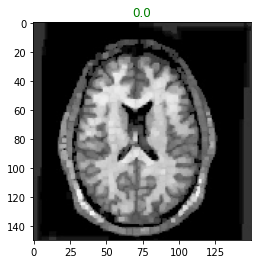

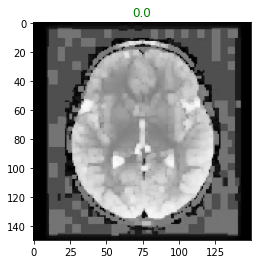

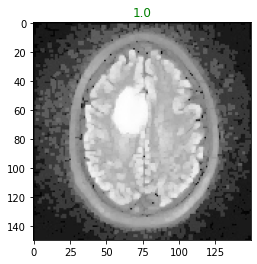

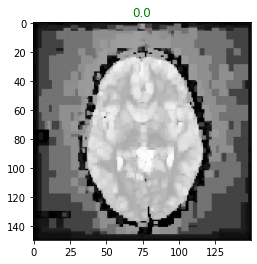

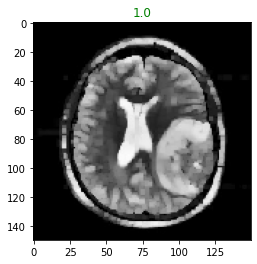

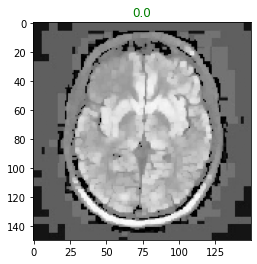

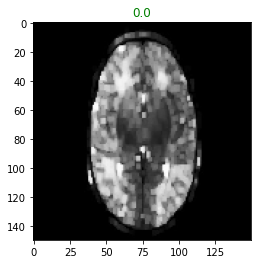

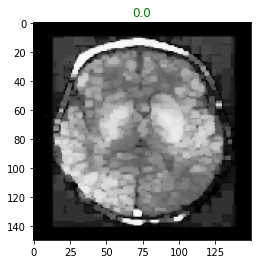

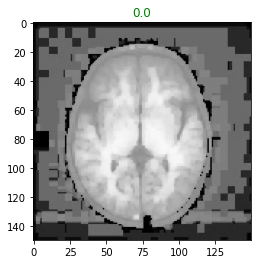

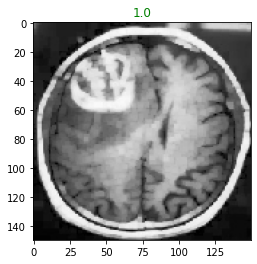

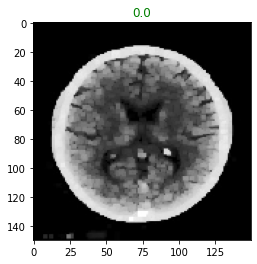

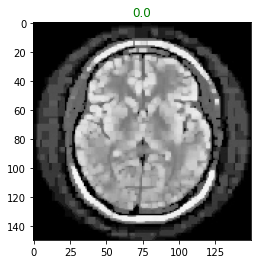

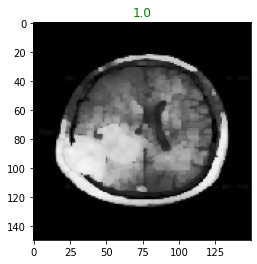

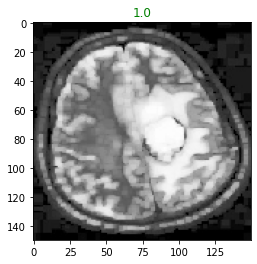

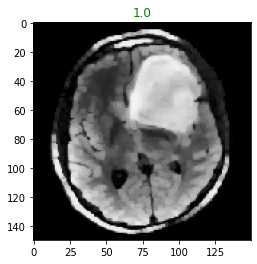

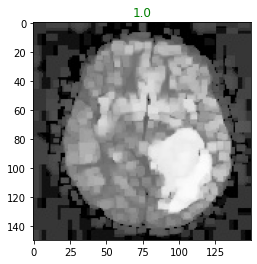

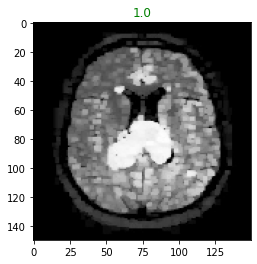

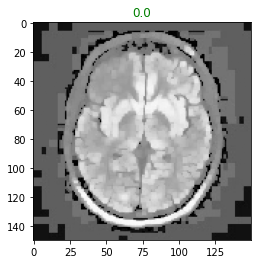

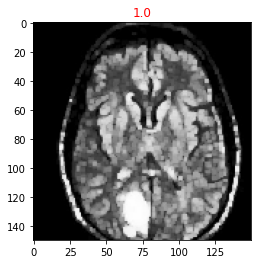

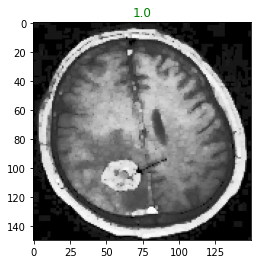

In [19]:
import matplotlib.pyplot as plt

count=0

while(count<20):
  
  x_batch,y_batch=next(test_gen)
  preds=reloaded_model.predict_classes(x_batch,batch_size=4)
  for i,image in enumerate(x_batch):
    count+=1
    plt.imshow(image)
    plt.title(y_batch[i],c='g' if y_batch[i]==preds[i][0] else 'r')
    plt.show()